# **Introduction to Applications of Quantum Computing to Quantum Chemistry**

1.   **Obtaining expectation value of a Hamiltonian.**

Consider the following Hamiltonian:
$$
K = \frac{1}{3}\sum_{i<j}X_iX_j-\sum_{n=0}^{n-1}Z_i
$$
where $n$ is the number of qubits (or wires, in Pennylane language), $X_i$ and $Z_i$ are the Pauli-X and Pauli-Z operators acting on the i-th qubit, respectively, and $\sum_{i<j}$ denotes a sum over all pairs $(i, j)$ where $i < j$. For example, for n = 3, the pairs that contribute to
the sum over $i < j$ are $(0, 1)$,$(0, 2)$ and $(1, 2)$.

Note that indexing starts from 0. You must implement in Pennylane a function that simulates a quantum circuit where the qubits start in the state $|0⟩$ and a Hadamard gate H is applied to all of them, producing a final state $|\psi⟩$.

The function must receive the number of qubits and return the expectation value of $K$ for $|\psi⟩$.

In [1]:
# Installing Pennyline
!pip install pennylane

# Importing the liberies
import pennylane as qml
from pennylane import numpy as pnp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00


In [2]:
# Exercise 1

def get_expectation_value():
  '''
    This function colect the number of qubits (qubits) enter by the user than
    create an circuit with n_ qubits for an expecifc Hamiltonian
    and return the expectation value.
  '''

  # Importing the liberies
  import pennylane as qml
  from pennylane import numpy as pnp

  # Requsting the number of qubits

  n_qubits = int(input("Enter the number of qubits that you desire: "))

  coefs = [1/3, -1]
  ops = [sum([qml.PauliX(i)@qml.PauliX(j) for i in range(n_qubits) for j in range(n_qubits) if i < j]), sum([qml.PauliZ(i) for i in range(n_qubits - 1)])]

  # Hamiltonian

  H = qml.Hamiltonian(coefs, ops)

  # Printing the Hamltonian

  print(f"\nThe Hamiltonian is given by: {H}")

  # Creating the circuit

  dev = qml.device("default.qubit", wires=n_qubits)
  @qml.qnode(dev)
  def circuit():
    # Hadamard gate on all qubits
    for i in range(n_qubits):
      qml.Hadamard(wires=i)
    return qml.expval(H)

  # Printing out the expectet value of the Hamiltonian:

  print(f"\nThe expectation value of the Hamiltonian is: {circuit()}")

  # Drawing the circuit
  print("\nVisualing the circuit: ")
  qml.draw_mpl(circuit)();

  return ''

Enter the number of qubits that you desire: 4

The Hamiltonian is given by: 0.3333333333333333 * (X(0) @ X(1) + X(0) @ X(2) + X(0) @ X(3) + X(1) @ X(2) + X(1) @ X(3) + X(2) @ X(3)) + -1 * (Z(0) + Z(1) + Z(2))

The expectation value of the Hamiltonian is: 2.0000000000000036

Visualing the circuit: 



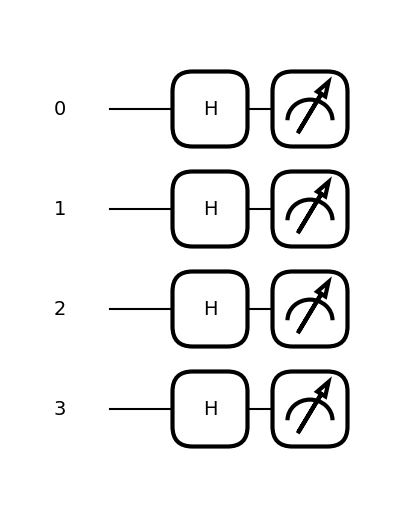

In [3]:
# Answer question 1 (Introduction to Applications of Quantum Computing to Quan- tum Chemistry)

print(get_expectation_value())

# **Introduction to Applications of Quantum Computing to Quantum Chemistry**

2.   **Ground state energy for molecule and spin system with Variational
Quantum Algorithms and Trotterization.**

Variational Quantum Algorithms (VQAs) are a class of hybrid quantum-classical algorithms. These algorithms leverage quantum circuits to accelerate computations while utilizing a classical optimizer to iteratively adjust the parameters of the circuit, seeking to minimize a cost function and ultimately find the correct solution.

(a) The calculation of molecular properties is crucial in scientific and technological fields, such as chemistry and the pharmaceutical industry. In particular, the ground state energy of a molecule provides valuable insights into its properties, including stability and reactivity.

You must implement a function in Pennylane that simulates the Variational Quantum Eigensolver (VQE). This function should take as input a six-entry array of floating-point numbers, representing the x, y and z coordinates of two hydrogen atoms. The first three entries correspond to the coordinates of the first hydrogen atom, and the remaining three entries represent the coordinates of the second hydrogen atom. The function should return the ground state energy of the molecule. Also explain why the Pauli-Z is necessary in Jordan-Wigner transformation.

**Observation: Explicitly define the STO-3G basis function set, multiplicity=1, charge=0 and Jordan-Wigner mapping in the code.**

(b) Consider a spin chain consisting of N spin-$\frac{1}{2}$
particles, where each spin can point either in the positive or negative z-direction. Additionally, an external magnetic field is applied to the system.

This quantum system is described by the Transverse Ising Hamiltonian. For a closed spin chain with a transverse magnetic field of intensity h, the Hamiltonian is:

$$ H = -\sum_{i=1}^N Z_i \otimes Z_{i+1} -h\sum_{n=1}^NX_i$$
where $Z_i$ and $X_i$ are the Pauli-Z and Pauli-X operators acting on the $i-th$ spin site, respectively. In a closed chain, the site $N + 1$ is identified with the first site.

You must implement a variational quantum algorithm in Pennylane that, for a given value of the transverse magnetic field h, computes the ground state energy of the spin chain with N = 4 sites. The magnetic field intensity h should be passed as an input to the algorithm.

(c) The total energy of a quantum system is represented by operator $H$. We know
that an initial quantum state $|\psi⟩$ evolves over time through the action of the evolution operator U, defined as

$$ U(t) = e^{-iHt} $$

However, it’s possible to build quantum circuits that approximates the realization of
$U(t)$, being one of these methods knows as Trotterization. If we can write $H$ as

$$ H = \sum_{i=0}^kH_i, $$
of a number $k$ of Hermitian operators $H_i$ that do not necessarily commute, we can approximate $U(t)$ via

$$U \approx ∏_{j=1}^n∏_{i=1}^ke^{\frac{-iH_it}{n}}, $$
with each term in the j-product called trotter step. The larger n is, i.e. more trotter
steps, the better the approximation of U that we get.

You must implement in Pennylane a function which applies the evolution operator
related to the Hamiltonian

$$H = αX⊗X + βZ⊗Z$$
in the state $|00⟩$. The function must receive as parameters α, β, the time t and the number
of trotter steps n in this order. It must return the probability of measure $|00⟩, |01⟩, |10⟩, |11⟩$.

# (a)

In [5]:
# Question (a)

def H2_molecule():

  '''
  This function returns the ground state of the H2 molecule.

  Enter the coordinates of the Hydrogen atoms as x, y, and z values separated by
  spaces.

  The function computes the ground state using a VQA with Hartree Fock initial
  state, a Double Excitation circuit ansatz and a Gradient Descent optimizer.
  '''

  # Collect the coordinates
  coord_1 = list(map(float, input('Enter the coordinates of the first H as x y z: ').split()))
  coord_2 = list(map(float, input('\nEnter the coordinates of the second H as x y z: ').split()))

  # Define the symbols and the coordinates
  symbols = ["H", "H"]
  coordinates = pnp.array([coord_1, coord_2])

  # Create the molecule
  molecule = qml.qchem.Molecule(symbols, coordinates, charge = 0, mult = 1, basis_name='sto-3g') # Creating the molecule with the exercise
  H, qubits = qml.qchem.molecular_hamiltonian(molecule, mapping='jordan_wigner')

  # Print out the Hamiltonian just to check if it's all right
  print(f"\nThe Hamiltonian is given by: {H}")

  # Connecting  with the device
  dev = qml.device("default.qubit", wires = qubits)

  # Creating the cost_function
  @qml.qnode(dev)
  def cost_function(params): # What is this params?
    qml.BasisState(pnp.array([1, 1, 0, 0]), wires = range(qubits)) # Creating the basis state
    qml.DoubleExcitation(params, wires = [0, 1, 2, 3]) # Why i have to use Double Exctations?

    return qml.expval(H)

  # Choose an optimizer
  opt = qml.GradientDescentOptimizer(stepsize = 0.4)

  # Initial guess parameters
  theta = pnp.array(0.20885146442480412, requires_grad=True)

  # Programing the optimzation routine
  energy = [cost_function(theta)] # Store the values of the cost function
  angle = [theta] # Store the values of the circuit parameter

  max_iterations = 40 # Maximum number of calls to the optimizer
  conv_tol = 1e-06 # Convergence threshold to stop our optimization procedure

  for n in range(max_iterations):
    theta,prev_energy=opt.step_and_cost(cost_function,theta)
    energy.append(cost_function(theta))
    angle.append(theta)
    conv=pnp.abs(energy[-1]-prev_energy)

    if conv<=conv_tol:
        break

  # Print out the value of the ground state energy
  print("\n" f"Final value of the ground-state energy = {energy[-1]:.8f} Ha")

  # Drawing the circuit
  print("\nVisualing the circuit:")
  qml.draw_mpl(cost_function)(1);

  return ''

Enter the coordinates of the first H as x y z: 0 0 0.64

Enter the coordinates of the second H as x y z: 0 0 -064

The Hamiltonian is given by: -0.5458607286622305 * I(0) + 0.039639439125117235 * Z(0) + 0.03963943912511722 * Z(1) + 0.1936514860798264 * (Z(0) @ Z(1)) + 0.03963943912517756 * Z(2) + 0.0038675742579624885 * (Z(0) @ Z(2)) + 0.039639439125177534 * Z(3) + 0.0038675742579624885 * (Z(0) @ Z(3)) + 0.0038675742579624885 * (Z(1) @ Z(2)) + 0.0038675742579624885 * (Z(1) @ Z(3)) + 0.1936514860796676 * (Z(2) @ Z(3))

Final value of the ground-state energy = -0.17402805 Ha

Visualing the circuit:



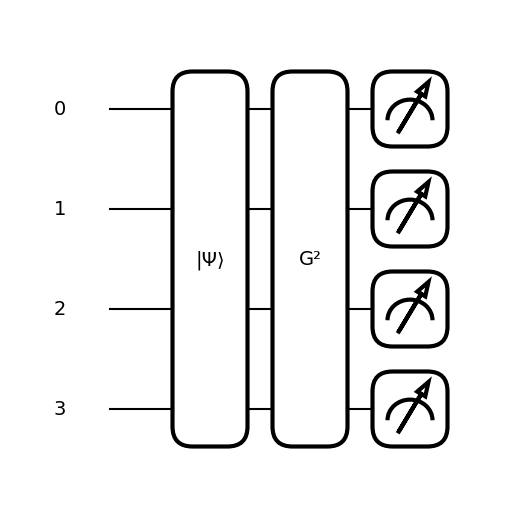

In [6]:
# Answer question 2(a) (Introduction to Applications of Quantum Computing to Quan- tum Chemistry)
print(H2_molecule())

# (b)

In [7]:
# Question (b)

def Ising_Model():
  '''
  This function calculates the ground state of a spin chain using the Transverse
  Ising Hamiltonian.

  Input the magnetic field intensity only. It computes the ground state for 4
  qubits with a VQA model, starting from |1,1,0,0> as the initial state,
  employing X and Z axis rotations as the ansatz and using a Gradient Descent
  optimizer.
  '''

  # Geting the h value
  h = float(input("Enter the extenal magnetic field: "))

  # Creating the Hamiltonian
  coefs = [-1, -h]
  ops = [sum(qml.PauliZ(i) @ qml.PauliZ(i+1) for i in range(1,4)) + qml.PauliZ(4) @ qml.PauliZ(1), sum(qml.PauliX(i) for i in range(1, 5))]
  H = qml.Hamiltonian(coefs, ops)

  # Printing the Hamltonian
  print(f"\nThe Hamiltonian is given by: {H}")

  # Creating the circuit
  dev = qml.device("default.qubit")
  @qml.qnode(dev)
  def cost_function(params):
    # Build the initial state
    qml.BasisState(pnp.array([1, 1, 0, 0]), wires = range(1, 5))
    # Applying rotation as an ansatz
    for i in range(1,5):
      qml.RX(params, wires = i)
      qml.RZ(params, wires = i)
    return qml.expval(H)

  # Choose an optimizer
  opt = qml.GradientDescentOptimizer(stepsize = 0.1)

  # Initial guess parameters
  theta = pnp.array(0.5, requires_grad=True)

  # Programing the optimzation routine
  energy = [cost_function(theta)] # Store the values of the cost function
  angle = [theta] # Store the values of the circuit parameter

  max_iterations = 40 # Maximum number of calls to the optimizer
  conv_tol = 1e-06 # Convergence threshold to stop our optimization procedure

  for n in range(max_iterations):
    theta,prev_energy=opt.step_and_cost(cost_function,theta)
    energy.append(cost_function(theta))
    angle.append(theta)
    conv=pnp.abs(energy[-1]-prev_energy)

    if conv<=conv_tol:
      break

  # Print out the value of the ground state energy
  print(f"\nFinal value of the ground-state energy = {energy[-1]:.6f} Ha")

  print("\nVisualizing the circuit:")

  qml.draw_mpl(cost_function)(1);

  return ''

Enter the extenal magnetic field: 0.1

The Hamiltonian is given by: -1 * (Z(1) @ Z(2) + Z(2) @ Z(3) + Z(3) @ Z(4) + Z(4) @ Z(1)) + -0.1 * (X(1) + X(2) + X(3) + X(4))

Final value of the ground-state energy = 0.000000 Ha

Visualizing the circuit:



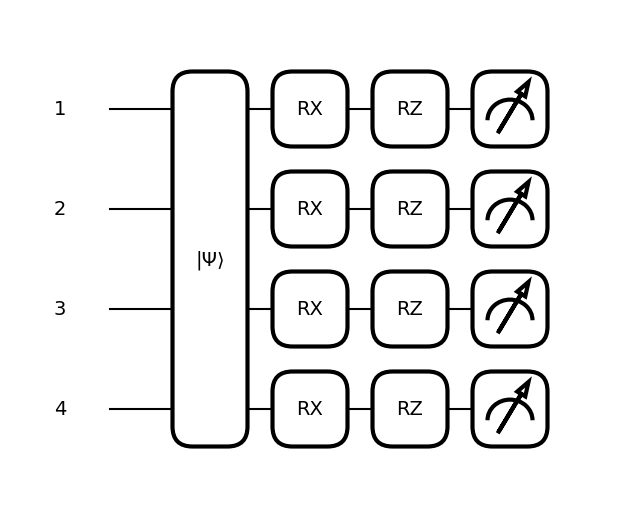

In [8]:
# Answer question 2(b) (Introduction to Applications of Quantum Computing to Quan- tum Chemistry)
print(Ising_Model())

# (c)

In [11]:
# Question (c)

def Time_Evolution():
  '''
  This function calculates the probability of states |0,0>, |0,1>, |1,0>, and
  |1,1> after time evolution at time t using the Trotterization method.

  The user inputs parameters a, b, the number of Trotter steps n, and time t.
  It utilizes a specified Hamiltonian H, starting from the initial state |0,0>,
  and applies Ising operators to compute time evolution and return the
  probabilities.
  '''

  # Reciving the parameters
  alpha = float(input("Enter the value of alpha: "))
  beta = float(input("Enter the value of beta: "))
  n = int(input("Enter the value of n: "))
  t = float(input("Enter the value of t: "))

  # Building the Hamiltonian
  coefs = [alpha, beta]
  ops = [qml.PauliX(0) @ qml.PauliX(1), qml.PauliZ(0) @ qml.PauliZ(1)]

  H = qml.Hamiltonian(coefs, ops)

  print(f"\nThe Hamiltonian is given by: {H}")

  # Creating the circuit
  wires = range(2)
  dev = qml.device("default.qubit", wires)
  @qml.qnode(dev)
  def circuit(time, n):
    qml.BasisState(pnp.array([0, 0]), wires = range(2))
    for i in range(n):
      qml.IsingXX(2*alpha*time/n, wires = [0,1])
      qml.IsingZZ(2*beta*time/n, wires = [0,1])

    return qml.probs(wires = [0,1])

  # Printing the answers

  print("\nProbabilitys for ours function:")
  print(f"\nThe probability of measure |00⟩ is: {circuit(t,n)[0]*100:.5f}%")
  print(f"The probability of measure |01⟩ is: {circuit(t,n)[1]*100:.5f}%")
  print(f"The probability of measure |10⟩ is: {circuit(t,n)[2]*100:.5f}%")
  print(f"The probability of measure |11⟩ is: {circuit(t,n)[3]*100:.5f}%\n")

  print("Visualizing the circuit:")

  qml.draw_mpl(circuit)(1,1);

  return ''


Enter the value of alpha: 1
Enter the value of beta: 1
Enter the value of n: 100
Enter the value of t: 5

The Hamiltonian is given by: 1.0 * (X(0) @ X(1)) + 1.0 * (Z(0) @ Z(1))

Probabilitys for ours function:

The probability of measure |00⟩ is: 8.04642%
The probability of measure |01⟩ is: 0.00000%
The probability of measure |10⟩ is: 0.00000%
The probability of measure |11⟩ is: 91.95358%

Visualizing the circuit:



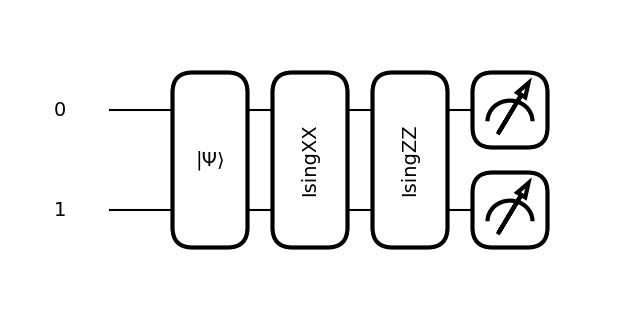

In [12]:
# Answer question 2(c) (Introduction to Applications of Quantum Computing to Quan- tum Chemistry)
print(Time_Evolution())

# **Bose-Einstein Condensates and the Involvement in Advances for New Technologies.**

3. **Computational project.**

To treat the dynamics of BECs, we need the time-dependent GPE:

$$
i\hbar \frac{\partial \psi(\vec{r},t)}{\partial t} = - \frac{\hbar^{2}}{2m}\nabla^{2}\psi(\vec{r},t)+V(\vec{r})\psi(\vec{r},t)+ U_{0}|\psi(\vec{r},t)|^{2}\psi(\vec{r},t)
$$

Studying the dynamics of interacting systems is challenging. Fortunately, we can employ
numerical methods to investigate these systems.

First, let us consider the one-dimensional non-interacting case. The dimensionless
equation we wish to solve is:

$$
H\psi(x,t) = i \frac{\partial \psi(x,t)}{\partial t}
$$
With
$$
H = -\frac{1}{2}\frac{(\partial^{2} \psi)}{\partial x^{2}}+ V(x)
$$

When solving problems analytically, we obtain $\psi(x,t)$ in the continuum of position
and time. Here, we will adopt a different approach, which is better suited to handle this
problem numerically. We begin by discretizing our spatial and temporal domains, i.e., we
consider $\psi(x_{i},t_{j})$ with equally-spaced points in space and time,$x_{i}= i \Delta x$ and $t_{j}=j \Delta j$(integer i and j).

Visscher proposed the algorithm for the temporal evolution we will employ in this
project (see the suggested bibliography). We write explicitly the real and imaginary parts
of the wave function: $\psi(x,t)= R(x,t)+ i I(x,t)$. Substituting it into the time-dependent Schrödinger equation, we obtain two equations:
$$
\frac{dR}{dt} = HI
$$
$$
\frac{dI}{dt} = -HR
$$

Instead of computing both the real and imaginary parts at the same time t, we calculate R at $t = 0, \Delta t,2\Delta,\dots t$ and I at $t= \frac{\Delta t}{2},\frac{3\Delta t}{2},\dots$Their time-evolution is given by:

$$
R\left( x,t+ \frac{\Delta t}{2} \right) = R\left( x,t- \frac{\Delta t}{2} \right)+ \Delta t HI(x,t)
$$
And
$$
I\left( x,t+ \frac{\Delta t}{2} \right)=I\left( x,t-\frac{\Delta t}{2} \right)-\Delta t HR(x,t)
$$

To start the algorithm, we need R(x, 0) (which comes from the initial conditions) and
I(x, ∆t/2), which can be obtained by performing a “half step”:

$$
I\left( x, \frac{\Delta t}{2} \right) = I(x,0)-HR(x,0) \frac{\Delta t}{2}
$$

These equations contain the kinetic operator applied to the real and imaginary
parts of the wave function. The second spatial derivative of a discretized function can be
calculated using:

$$
\frac{\partial^{2}f(x_{i},t_{j})}{\partial x^{2}}\approx \left[ \frac{f(x_{i+1},t_{j})-2f(x_{i},t_{j})+f(x_{i-1},t_{j})}{(\Delta x)^{2}} \right]
$$
The probability density is not obvious in this case since we are computing the real
and imaginary components of the wave function at different time instants. We have two
alternatives:

$$
P(x,t) = R(x,t)^{2} + I\left( x,t+ \frac{\Delta t}{2} \right)I\left( x,t - \frac{\Delta t}{2} \right)
$$
Or
$$
P(x,t) = I(x,t)^{2} + R\left( x,t+ \frac{\Delta t}{2} \right)R\left( x,t - \frac{\Delta t}{2} \right)
$$

Finally, we have to check if the values we choose for ∆x and ∆t provide a stable
evolution. The stability criterion is given by:

$$
-\frac{2}{\Delta t}<V< \frac{2}{\Delta t}-\frac{2}{(\Delta x)^{2}}
$$

which means that, for a given V and ∆x, we can always decrease ∆t to fulfill the stability
condition.

Write a program that uses the algorithm above to compute the time-evolution of an
initial state subjected to a harmonic trap,

$$
V(x) = \frac{1}{2}x^{2}
$$

Consider a spatial domain from −L to L. Choose a value L that is sufficiently large so
we can assume $\psi(-L,t_{j})=\psi(L,t_{j})=0 \enspace \forall \enspace t_{j}$ during the whole evolution. Plot P(x, t) for
different values of t. Alternatively, you can make a gif with the time evolution.

## *a)*

Consider the initial state:

$$
\psi(x,0) = \left( \frac{1}{\pi} \right)^{1/4}e^{-x^{2}/2}
$$
What happens? Why?

## *b)*

Consider the initial state:

$$
\psi(x,0) = \left( \frac{2}{\pi} \right)^{1/4}e^{-x^{2}}
$$
What happens? Why?

## c)

Now that we have some familiarity with the non-interacting case, we can consider

the one-dimensional GPE. We have to modify our algorithm to take into account the non-
linear term. This can be done by including the non-linear term  $U_{0}|\psi(x,t)|^{2}$.


$$
R\left( t+ \frac{\Delta t}{2} \right) = R\left( t- \frac{\Delta t}{2} \right) + \Delta t\left[ -\frac{1}{2} \frac{\partial^{2}}{\partial x^{2}}+V+ U_{0}\left( R\left( t+ \frac{\Delta t}{2} \right)R\left( t- \frac{\Delta t}{2} \right) + I(t)^{2} \right) \right]I(t)
$$

$$
I\left( t+ \frac{\Delta t}{2} \right) = I\left( t- \frac{\Delta t}{2} \right) - \Delta t\left[ -\frac{1}{2} \frac{\partial^{2}}{\partial x^{2}}+V+ U_{0}\left( I\left( t+ \frac{\Delta t}{2} \right)I\left( t- \frac{\Delta t}{2} \right) + R(t)^{2} \right) \right]I(t)
$$
where we omitted the spatial dependence for brevity. Solving for $R\left( t+ \frac{\Delta t}{2} \right)$ and $I\left( t+\frac{\Delta t}{2} \right)$ we have the algorithm for the updates:


$$
R\left( t+ \frac{\Delta t}{2} \right) = \frac{R\left( t- \frac{\Delta t}{2} \right) + \Delta t\left[ -\frac{1}{2} \frac{\partial^{2}}{\partial x^{2}}+V+ U_{0}\left( R\left( t+ \frac{\Delta t}{2} \right)R\left( t- \frac{\Delta t}{2} \right) + I(t)^{2} \right) \right]I(t)}{1-\Delta tU_{0}R\left( t-\frac{\Delta t}{2} \right)I(t)}
$$

$$
I\left( t+ \frac{\Delta t}{2} \right) =\frac{ I\left( t- \frac{\Delta t}{2} \right) - \Delta t\left[ -\frac{1}{2} \frac{\partial^{2}}{\partial x^{2}}+V+ U_{0}\left( I\left( t+ \frac{\Delta t}{2} \right)I\left( t- \frac{\Delta t}{2} \right) + R(t)^{2} \right) \right]I(t)}{1-\Delta tU_{0}I\left( t-\frac{\Delta t}{2} \right)R(t)}
$$

For the “half step”, the generalization:

$$
I\left( x, \frac{\Delta t}{2} \right)= I(x,0)- \frac{\Delta t}{2}\left[ -\frac{1}{2} \frac{\partial^{2}}{\partial x^{2}}+V+U_{0}(R(x,0)^{2}+I(x,0)^{2}) \right]R(x,0)
$$

Modify your program to consider a non-zero value of U0, that is, the updates given. Consider the case of V = 0, U0 = −2, and the initial state:
$$
\psi(x,0)= \frac{1}{\sqrt{ 2 }\cosh(x)}
$$
What happens? Why?

In [35]:
#@title Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math as m

#a)

In [36]:
def potential(x):
    return 0.5 * x**2


def initialconditions(V, R0, deltax, L, timeframe):
    # Initialize the spatial grid
    x = np.linspace(-L, L, int(2 * L / deltax) + 1)
    n_x = len(x)

    # Calculate dx and dx squared
    dx = (x[-1] - x[0]) / (n_x - 1)
    dx2 = dx ** 2

    # Initialize wavefunction and potential arrays
    realPsi = np.zeros(n_x, dtype=np.longdouble)
    imagPsi = np.zeros(n_x, dtype=np.longdouble)
    potential = np.array([V(xi) for xi in x], dtype=np.longdouble)

    # Initialize the wavefunctions using provided functions
    for i in range(n_x):
        realPsi[i] = R0(x[i])

    # Initialize time step size
    dt = finddeltat(V, dx, L)

    # Half-step update for the imaginary part (as in the Java code)
    # Advances the imaginary part by half a time step
    for i in range(1, n_x - 1):
        deltaRe = (potential[i] * realPsi[i]
                   - 0.5 * (realPsi[i + 1] - 2 * realPsi[i] + realPsi[i - 1]) / dx2)
        imagPsi[i] -= deltaRe * dt / 2

    # Apply boundary conditions (imagPsi and realPsi set to zero at boundaries)
    realPsi[0] = realPsi[-1] = 0.0
    imagPsi[0] = imagPsi[-1] = 0.0

    # Create time array
    t = np.arange(0, timeframe + dt, dt)

    return realPsi, imagPsi, x, t

def finddeltat(V,deltax,L):
    #in this specific potential(the harmonic trap) as V always increases for modulus(x), its biggest value is given by V(L)
    #As the harmonic trap is always positive, the lower bound is 0
    upperbounddt = 1/((V(L)/2) + (1/deltax**2))
    deltat = round(upperbounddt/2,4)
    return deltat

def step(realPsi, imagPsi, potential, dx2, dt,x):
    n = len(imagPsi)
    # Copy arrays to avoid overwriting values needed for computations
    realPsi_old = realPsi.copy()
    imagPsi_old = imagPsi.copy()

    # Update realPsi using imagPsi_old
    for i in range(1, n - 1):
        imH = potential(x[i]) * imagPsi_old[i] - 0.5 * (imagPsi_old[i + 1] - 2 * imagPsi_old[i] + imagPsi_old[i - 1]) / dx2
        realPsi[i] += imH * dt

    # Apply boundary conditions to realPsi
    realPsi[0] = 0.0
    realPsi[-1] = 0.0

    # Update imagPsi using updated realPsi
    for i in range(1, n - 1):
        reH = potential(x[i]) * realPsi[i] - 0.5 * (realPsi[i + 1] - 2 * realPsi[i] + realPsi[i - 1]) / dx2
        imagPsi[i] -= reH * dt

    # Apply boundary conditions to imagPsi
    imagPsi[0] = 0.0
    imagPsi[-1] = 0.0

    return realPsi, imagPsi

def visscheralgorithm(potential, R0, deltax, L, timeframe):
    x = np.arange(-L, L + deltax, deltax)
    n_x = x.size
    dx2 = deltax ** 2


    # Compute time step size
    dt = finddeltat(potential, deltax, L)
    n_t = int(timeframe / dt) + 1  # Ensure the total time is covered
    t = np.linspace(0, timeframe, n_t)

    # Initialize wavefunction arrays
    realPsi = R0(x)
    imagPsi = np.zeros_like(realPsi)

    # Arrays to store wavefunction over time
    R = np.zeros((n_t, n_x))
    I = np.zeros((n_t, n_x))

    # Store initial conditions
    R[0, :] = realPsi
    I[0, :] = imagPsi

    # Time-stepping loop
    for j in range(1, n_t):
        realPsi, imagPsi = step(realPsi, imagPsi, potential, dx2, dt,x)
        R[j, :] = realPsi
        I[j, :] = imagPsi

    # Transpose R and I to match shape (n_x, n_t)
    R = R.T
    I = I.T

    return x, t, R, I,dt

In [37]:
# In this case

def initialstatea(x):
    return ((1/np.pi)**(1/4))*np.exp(-(x**2)/2)

x,t,R,I,deltat = visscheralgorithm(potential,initialstatea,0.3,30,10)
 # Calculate probability density
P_A = np.zeros_like(R)
for i in range(R.shape[0]-1):
    for j in range(R.shape[1]-2):
        P_A[i,j] = (R[i,j]**2)+ I[i,j]*I[i,j+1]
print(deltat)
P_A.max()

0.0021


0.571611907812558

## GIF Generating

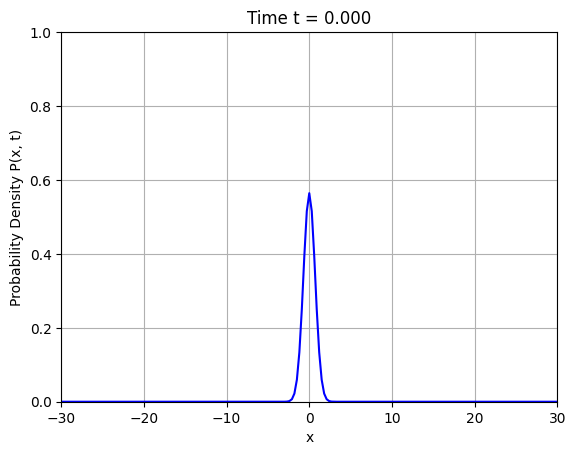

In [38]:
fig, ax = plt.subplots()

skipsize = 20  # Set your desired skip size here

def animate(i):
    ax.clear()
    # i is the actual frame index after skipping
    ax.plot(x, P_A[:, i], color='blue')
    # Set plot limits
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density P(x, t)')
    ax.set_title(f'Time t = {t[i]:.3f}')
    ax.grid(True)

# Create a list of frame indices, selecting every 'skipsize' frame
frame_indices = range(0, len(t), skipsize)

# Adjust the interval to maintain the total animation duration
original_interval = 50  # Original interval in milliseconds
adjusted_interval = original_interval * skipsize

# Create the animation object
anim = FuncAnimation(
    fig,
    animate,
    frames=frame_indices,   # Use the list of skipped frames
    interval=adjusted_interval,  # Adjust interval accordingly
    repeat=False
)

# Save the animation as a GIF
anim.save('probability_density_evolution_a.gif', writer='pillow', fps=20)

# b)

In [39]:
def initialstateb(x):
    return ((2/np.pi)**(1/4))*np.exp(-(x**2))

x,t,R,I,deltat = visscheralgorithm(potential,initialstateb,0.3,30,10)
 # Calculate probability density
P_B = np.zeros_like(R)
for i in range(R.shape[0]-1):
    for j in range(R.shape[1]-2):
        P_B[i,j] = (R[i,j]**2)+ I[i,j]*I[i,j+1]
print(deltat)
P_B.max()

0.0021


0.7978909966688543

## GIF Generating

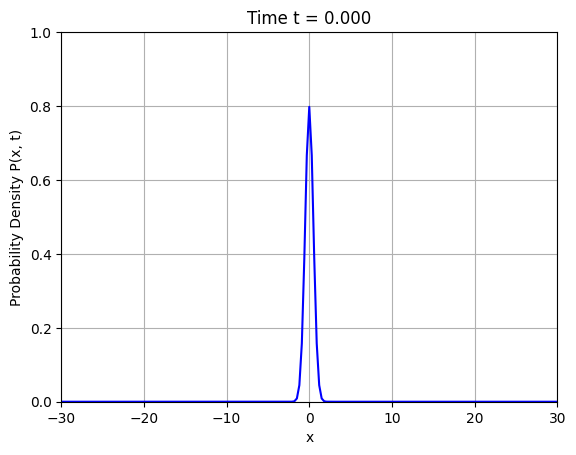

In [40]:
fig, ax = plt.subplots()

skipsize = 20

def animate(i):
    ax.clear()
    ax.plot(x, P_B[:, i], color='blue')
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density P(x, t)')
    ax.set_title(f'Time t = {t[i]:.3f}')
    ax.grid(True)

#list of frame indices
frame_indices = range(0, len(t), skipsize)


original_interval = 20  # Original interval in milliseconds
adjusted_interval = original_interval * skipsize

# animation object
anim = FuncAnimation(
    fig,
    animate,
    frames=frame_indices,   # list of skipped frames
    interval=adjusted_interval,
    repeat=False
)

# Save the animation as a GIF
anim.save('probability_density_evolution_b.gif', writer='pillow', fps=20)

# c)

In [41]:
def I0(x):
    return 0.0  # Initial imaginary part is zero

# Calculate maximum stable time step size for linear part
def finddeltat(V, deltax, L):
    # Calculate the maximum potential value within the domain
    x_max = L
    V_max = V(x_max)
    # Compute the stability limit for the time step(we will use 90%)
    deltat = 0.9 / ((V_max / 2) + (1 / deltax**2))
    return deltat

# Function to perform a single step update with the nonlinear interaction term
def step(realPsi, imagPsi, potential, dx2, dt, U0):
    n = len(realPsi)

    # Copy arrays to avoid overwriting values needed for computations
    realPsi_old = realPsi.copy()
    imagPsi_old = imagPsi.copy()

    # Update realPsi using imagPsi_old with nonlinear interaction
    for i in range(1, n - 1):
        # Compute Hamiltonian operator acting on imagPsi (nonlinear)
        laplacian_imagPsi = (imagPsi_old[i + 1] - 2 * imagPsi_old[i] + imagPsi_old[i - 1]) / dx2
        interaction_term = U0 * (realPsi_old[i] ** 2 + imagPsi_old[i] ** 2)
        H_imag = -0.5 * laplacian_imagPsi + potential[i] + interaction_term

        # Update realPsi with nonlinear interaction
        denominator = 1 - dt * U0 * realPsi_old[i] * imagPsi_old[i]
        realPsi[i] = (realPsi_old[i] + dt * H_imag * imagPsi_old[i]) / denominator

    # Apply boundary conditions to realPsi
    realPsi[0] = 0.0
    realPsi[-1] = 0.0

    # Update imagPsi using updated realPsi with nonlinear interaction
    for i in range(1, n - 1):
        # Compute Hamiltonian operator acting on realPsi (nonlinear)
        laplacian_realPsi = (realPsi[i + 1] - 2 * realPsi[i] + realPsi[i - 1]) / dx2
        interaction_term = U0 * (realPsi[i] ** 2 + imagPsi[i] ** 2)
        H_real = -0.5 * laplacian_realPsi + potential[i] + interaction_term

        # Update imagPsi with nonlinear interaction
        denominator = 1 + dt * U0 * imagPsi_old[i] * realPsi_old[i]
        imagPsi[i] = (imagPsi_old[i] - dt * H_real * realPsi[i]) / denominator

    # Apply boundary conditions to imagPsi
    imagPsi[0] = 0.0
    imagPsi[-1] = 0.0

    return realPsi, imagPsi

# Function to implement the Visscher algorithm with the nonlinear term
def visscheralgorithmnonlinear(V, R0, I0, deltax, L, timeframe, U0):
    x = np.linspace(-L, L, int(2 * L / deltax) + 1)
    n_x = len(x)
    dx2 = deltax ** 2

    # Initialize potential
    potential_values = np.array([V(xi) for xi in x], dtype=np.longdouble)

    # Compute time step size
    dt = finddeltat(V, deltax, L)
    n_t = int(timeframe / dt) + 1  # Ensure the total time is covered
    t = np.linspace(0, timeframe, n_t)

    # Initialize wavefunction arrays
    realPsi = np.array([R0(xi) for xi in x], dtype=np.longdouble) # np.sqrt(10)is due to the fact that R0 is not normalized in -L to L
    imagPsi = np.array([I0(xi) for xi in x], dtype=np.longdouble)

    # Arrays to store wavefunction over time
    R = np.zeros((n_t, n_x))
    I = np.zeros((n_t, n_x))

    # Store initial conditions
    R[0, :] = realPsi
    I[0, :] = imagPsi

    # Time-stepping loop
    for j in range(1, n_t):
        realPsi, imagPsi = step(realPsi, imagPsi, potential_values, dx2, dt, U0)
        R[j, :] = realPsi
        I[j, :] = imagPsi

    # Transpose R and I to match shape (n_x, n_t)
    R = R.T
    I = I.T

    return x, t, R, I,dt

In [42]:
# Potential function (V=0 for this specific problem)
def potential(x):
    return 0.0
def initialstatecimag(x):
    return 0.0

# Nonlinear parameter U0
U0 = -2
# Define the initial wavefunction components
def initialstatec(x):
    return 1.0 /( (np.sqrt(2) * np.cosh(x))*np.sqrt(5))

x,t,R,I,deltat = visscheralgorithmnonlinear(potential,initialstatec,initialstatecimag,0.2,100,4,U0)
 # Calculate probability density
P_C = np.zeros_like(R,dtype = np.longdouble)
for i in range(R.shape[0]-1):
    for j in range(R.shape[1]-2):
        P_C[i,j] = ((R[i,j]**2)+ I[i,j]*I[i,j+1] )
print(deltat)

P_C[:,0].sum()

0.036000000000000004


0.9999999999999997978

## GIF Generating

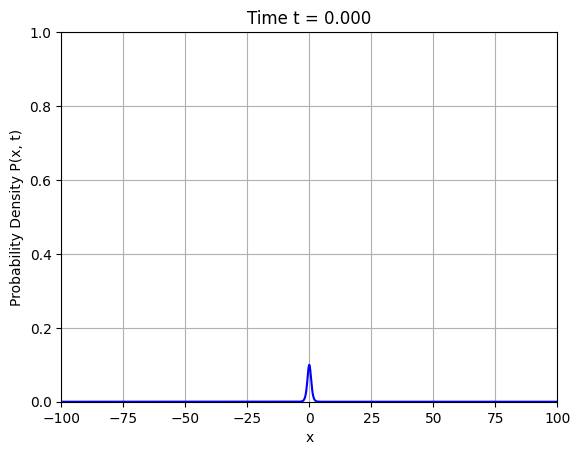

In [43]:
fig, ax = plt.subplots()

skipsize = 1

def animate(i):
    ax.clear()
    ax.plot(x, P_C[:, i], color='blue')
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density P(x, t)')
    ax.set_title(f'Time t = {t[i]:.3f}')
    ax.grid(True)

#list of frame indices
frame_indices = range(0, len(t), skipsize)


original_interval = 20  # Original interval in milliseconds
adjusted_interval = original_interval * skipsize

# animation object
anim = FuncAnimation(
    fig,
    animate,
    frames=frame_indices,   # list of skipped frames
    interval=adjusted_interval,
    repeat=False
)

# Save the animation as a GIF
anim.save('probability_density_evolution_c.gif', writer='pillow', fps=20)

# Teorical Question

## *a)*

Consider the initial state:

$$
\psi(x,0) = \left( \frac{1}{\pi} \right)^{1/4}e^{-x^{2}/2}
$$
What happens? Why?

This is the ground state of a harmonic oscillator. When subjected to the harmonic potential $ V(x) = \frac{1}{2}x^2$, the wave function retains its Gaussian form over time. While the wave function slightly oscillates, its overall shape remains preserved. The chosen wave function corresponds exactly to the ground state of the quantum harmonic oscillator. For this system, the ground state is a stationary solution of the Schrödinger equation in a harmonic potential. As a result, the wave function does not disperse and remains stable during the time evolution. The time-dependent Schrödinger equation merely introduces a global phase factor in the wave function, which does not alter the probability density.

## *b)*

Consider the initial state:

$$
\psi(x,0) = \left( \frac{2}{\pi} \right)^{1/4}e^{-x^{2}}
$$
What happens? Why?

In this case, the initial wave function is more compressed than the ground state of the harmonic potential. During time evolution, the wave function expands and oscillates before stabilizing into a periodic behavior. This wave function is not a stationary state of the harmonic potential. Initially, the wave function is compressed, but since it doesn't correspond to an eigenstate of the harmonic oscillator Hamiltonian, it does not remain stable. Instead, the wave function periodically expands and contracts in response to the potential. This behavior reflects the oscillatory nature of the harmonic oscillator, where any initial state that is not a ground or specific excited state will result in periodic motion.

## *c)*

Consider the case of V = 0, U0 = −2, and the initial state:
$$
\psi(x,0)= \frac{1}{\sqrt{ 2 }\cosh(x)}
$$
What happens? Why?

In this scenario, the initially localized wave function contracts due to the attractive interaction (represented by $U_0 = -2$). The wave function collapses into a more localized region over time, a phenomenon known as non-linear collapse or focusing. If $U_0$ is too negative, a singularity (collapse to a point) may occur at future times. The presence of attractive interactions (with
$U_0 < 0$) causes the atoms in the condensate to experience a mutual attraction. This leads to the collapse of the wave function, as the potential energy associated with the non-linear term dominates the kinetic term. In the extreme case, the wave function could completely collapse into a point, but in our case, it simply becomes more concentrated. This collapse behavior is typical for systems with strong attractive interactions, as described by the GPE with $U_0<0$.